## Jon Ishaque 
## ATU. HDip Dat Analytics Machine Learning and Statistics
## 02. Models

<h3 style="color: #001a79;">Exercise 2.1</h3>

<hr style="border-top: 1px solid #001a79;" />

Use numpy and matplotlib to plot the absolute value function.



In [5]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

#Create an array of values

In [6]:
x = np.arange(-3.14,2*3.14)  #[1]

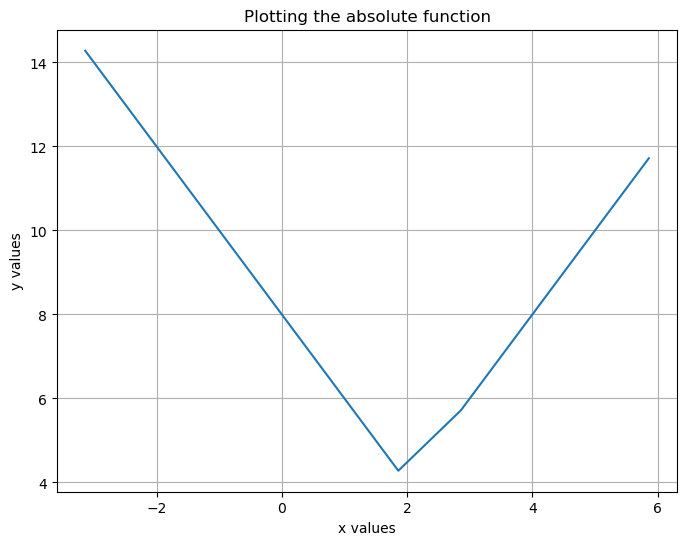

In [7]:

#create a function and abs for independent values (ePythonGuru, 2019),(SciKit Learn, 2019) 
y = 2 * abs(x-2)+4

plt.plot(x,y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Plotting the absolute function")
plt.grid(True)
plt.show()

x

In [8]:
y

array([14.28, 12.28, 10.28,  8.28,  6.28,  4.28,  5.72,  7.72,  9.72,
       11.72])

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

It is as much because the least squares is a better method than absolute.
"For example to minimize the cost function (e.g. in gradient descent), you need to take derivations. Taking derivations of a squared value is much more easier than an absolute value" MathsStackExchange(2014)

What this means is that squaring emphasises small differences, while absolutes, close to zero are harder to differentiated. Quora (2022)

<h3 style="color: #001a79;">Exercise 2.1</h3>

<hr style="border-top: 1px solid #001a79;" />

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

In [16]:
#input the data  plots
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
#convert x and y to numpy arrays
x =np.array(x)
y=np.array(y)

#### 1. get m & c numpy polyfit

In [30]:

m_pf, c_pf = np.polyfit(x, y, 1) 
m_pf, c_pf

(0.10315789473684217, 1.0494736842105254)

---
#### 2. get m & c using scipy.optimize.minimize

In [24]:

import scipy.optimize as so
# We are using minimize function in scipy.optimize.

# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # 
# x and y are have fixed values in this scenario as above.
#Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    #needs to be numpy arrays xa and 
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [25]:

#pass in the cost function. requires 2 arguments

#Initial guess. 
#so send guesses
#remember we dont know 5,10! we're trying to find it out.
result = so.minimize(cost, (1.0, 4.0))
# Show the results.
result

      fun: 1.0395789473691097
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([-1.49011612e-08,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [ ]:
#get optimized m an c from x array for optimisation

In [27]:
m_o,c_o = result.x

m_o,c_o

(0.10315785999887672, 1.0494740587670763)

---
#### 3. scipy.optimize.curve_fit

In [31]:
# Create the model function for curve_fit
def f(x, m, c):
    return m * x + c

In [32]:
# Run curve_fit.
result = so.curve_fit(f, x, y)

In [33]:
# Look at the result. #expect to see values for m and c in there
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [ ]:
#m and c 1st array returned

In [34]:
m_cf,c_cf = result[0]
m_cf,c_cf

(0.10315789458399933, 1.0494736859688867)

---
#### Plot the 3 lines

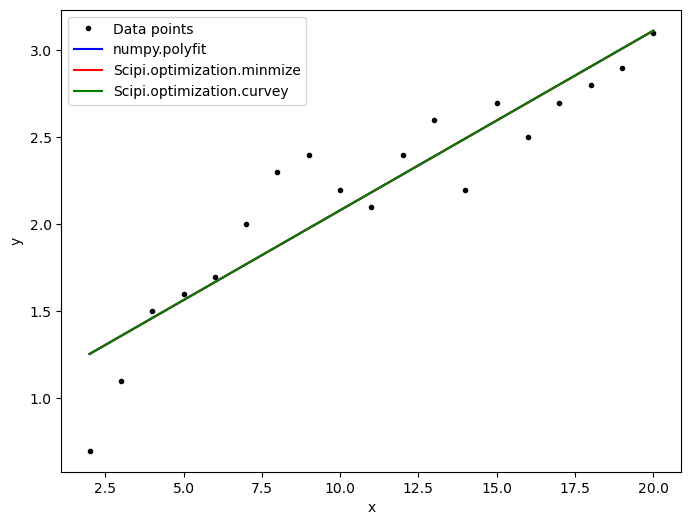

In [35]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Data points')
plt.plot(x, m_pf * x + c_pf, 'b-', label='numpy.polyfit') 
plt.plot(x, m_o * x + c_o, 'r-', label='Scipi.optimization.minmize') 
plt.plot(x, m_cf * x + c_cf, 'g-', label='Scipi.optimization.curvey')
# Add axis labels and a legend.
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot.
plt.show()

The 3 lines overlay each other. 
I think straight line is a good model for these data points 

#### References

Program to plotting absolute function? (no date) ePythonGuru. Available at: https://www.epythonguru.com/2019/11/how-to-plot-absolute-function.html 

MathsStackExchange(2014) Why get the sum of squares instead of the sum of absolute values?, Mathematics Stack Exchange. Available at: https://math.stackexchange.com/questions/967883/why-get-the-sum-of-squares-instead-of-the-sum-of-absolute-values  

SciKit Learn (2019) Plotting the absolute value function - py-earth 0.1.0 documentation. Available at: https://contrib.scikit-learn.org/py-earth/auto_examples/plot_v_function.html (Accessed: January 6, 2023). 

Stackoverflow (2019) I'm plotting absolute value functions in matplotlib and the graph just goes around the vertex, Stack Overflow. Available at: https://stackoverflow.com/questions/64047985/im-plotting-absolute-value-functions-in-matplotlib-and-the-graph-just-goes-arou 

Quora (2022) Why do we square instead of using the absolute value when calculating variance and standard deviation? (no date) Quora. Available at: https://www.quora.com/Why-do-we-square-instead-of-using-the-absolute-value-when-calculating-variance-and-standard-deviation (Accessed: January 6, 2023). 